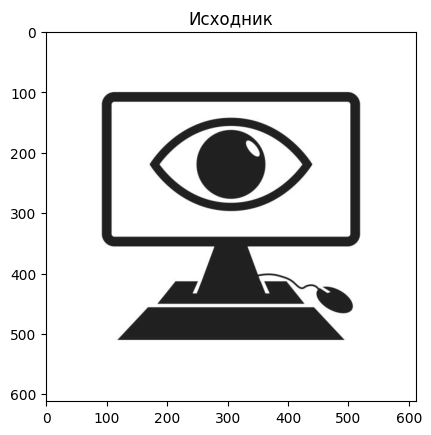

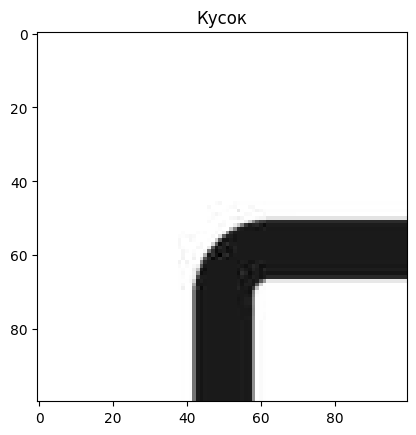

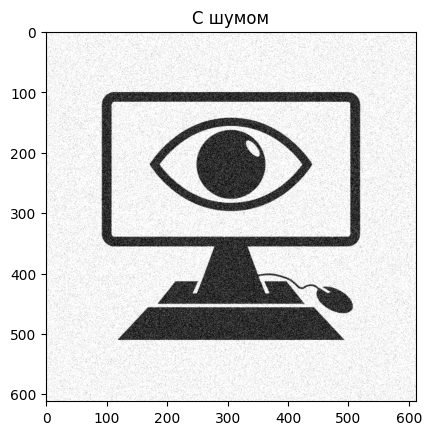

In [27]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise

# Загрузка изображения
img = cv.imread("lab8.jpg")
img_bw = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_bw, cmap="gray")
plt.title("Исходник")
plt.show()


# Вырезаем фрагмент изображения для эталона
template = img_bw[50:150, 50:150]

# Выводим эталон
plt.imshow(template, cmap="gray")
plt.title("Кусок")
plt.show()


noise_img = random_noise(img_bw, mode='gaussian', clip=True, mean=0, var=0.01)
noise_img = np.array(255 * noise_img, dtype='uint8')

# Вывод изображения с шумом
plt.imshow(noise_img, cmap="gray")
plt.title("С шумом")
plt.show()

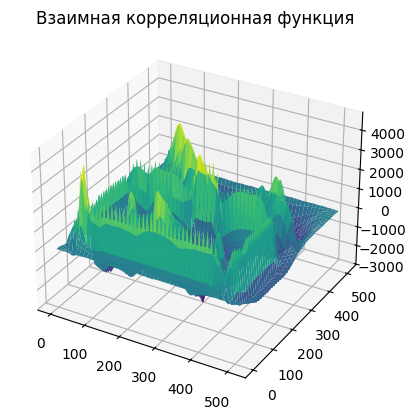

In [28]:
def mutual_correlation(image, template):
    N, M = image.shape
    n, m = template.shape
    corr = np.zeros((N - n + 1, M - m + 1))
    mean_image = np.mean(image)
    mean_template = np.mean(template)
    for i in range(N - n + 1):
        for j in range(M - m + 1):
            sub_image = image[i:i+n, j:j+m]
            corr[i, j] = np.sum((sub_image - mean_image) * (template - mean_template)) / (n * m)
    
    return corr

correlation_result = mutual_correlation(noise_img, template)

# Выводим корреляционную функцию на 3D графике
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Генерация координат
x = np.arange(correlation_result.shape[1])
y = np.arange(correlation_result.shape[0])
X, Y = np.meshgrid(x, y)
Z = correlation_result

# Построение графика
ax.plot_surface(X, Y, Z, cmap='viridis')

plt.title("Взаимная корреляционная функция")
plt.show()


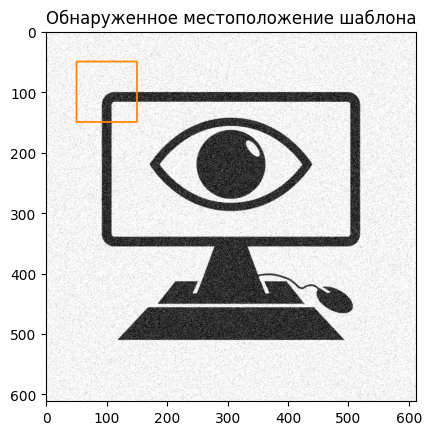

Предположительное место эталона: (50, 50)
Реальные координаты эталона: (50, 50)


In [30]:
max_index = correlation_result.argmax()
i_max = max_index % correlation_result.shape[1]
j_max = max_index // correlation_result.shape[1]
image_copy = noise_img.copy()
image_copy = cv.cvtColor(image_copy, cv.COLOR_GRAY2BGR)
h, w = template.shape
image_copy = cv.rectangle(image_copy, (i_max, j_max), (i_max + w, j_max + h), (255, 134, 0), 2)

plt.imshow(image_copy)
plt.title("Обнаруженное местоположение шаблона")
plt.show()

print(f"Предположительное место эталона: ({i_max}, {j_max})")
print(f"Реальные координаты эталона: (50, 50)")


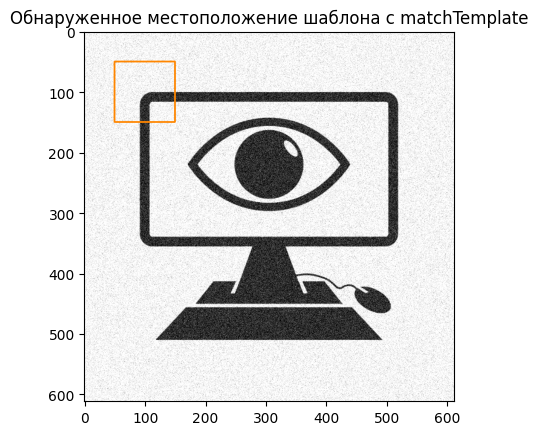

Координаты максимума с matchTemplate: 50, 50


In [35]:
# # Используем cv.matchTemplate для сравнения
# result = cv.matchTemplate(noise_img, template, cv.TM_CCORR_NORMED)

# # Нахождение максимума
# min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

# # Отображаем результат
# image_copy = cv.cvtColor(noise_img, cv.COLOR_GRAY2BGR)
# image_copy = cv.rectangle(image_copy, max_loc, (max_loc[0] + w, max_loc[1] + h), (255, 134, 0), 2)

# # Выводим результат
# plt.imshow(image_copy)
# plt.title("Обнаруженное местоположение шаблона с matchTemplate")
# plt.show()

# # Выводим координаты максимума
# print(f"Координаты максимума с matchTemplate: {max_loc}")

result = cv.matchTemplate(noise_img, template, cv.TM_CCORR_NORMED)

max_index = result.argmax()

i_max = int(max_index%result.shape[1])
j_max = int(max_index/result.shape[1])

image_copy = noise_img
image_copy = cv.cvtColor(image_copy,cv.COLOR_GRAY2BGR)
I, J = template.shape

image_copy = cv.rectangle(image_copy, (i_max, j_max), (i_max + I, j_max + J), (255, 134, 0), 2)  
plt.imshow(np.array(image_copy))
plt.title("Обнаруженное местоположение шаблона с matchTemplate")
plt.show()
print(f"Координаты максимума с matchTemplate: {i_max}, {j_max}")

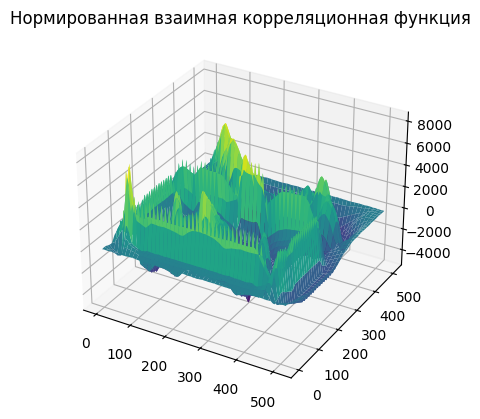

In [29]:
def normalized_mutual_correlation(image, template):
    N, M = image.shape
    n, m = template.shape
    corr = np.zeros((N - n + 1, M - m + 1))
    std_image = np.std(image)
    std_template = np.std(template)
    for i in range(N - n + 1):
        for j in range(M - m + 1):
            sub_image = image[i:i+n, j:j+m]
            corr[i, j] = np.sum((sub_image - np.mean(image)) * (template - np.mean(template))) / (std_image * std_template)
    
    return corr

# Применяем нормированную корреляцию
norm_corr_result = normalized_mutual_correlation(noise_img, template)

# Выводим 3D график
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = norm_corr_result
ax.plot_surface(X, Y, Z, cmap='viridis')

plt.title("Нормированная взаимная корреляционная функция")
plt.show()
